#### Gerardo Granados Aldaz   A01568072
#### Sebastian Salazar Villanueva  A01568158
#### Abraham Alejandro Saenz Tirado      A00823861

## Objetivo del proyecto: 
El propósito de este proyecto es poder elaborar un analisis exploratorio de
los libros empleando diversos algoritmos que estudiamos durante el curso. Analisis estadísticos,
algoritmos no supervisados y elementos de visualización serán sus principales herramientas para
este analisis. Adicionalmente cualquier algoritmo o herramienta que no hayamos visto durante el
curso es válida, sin embargo, es importante que conozcan el funcionamiento y puedan explicar lo
que se está realizando con claridad.

## Resultados del proyecto:
Los elementos mínimos que su analisis debe cumplir son los siguientes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para poder analizar los datos preprocesamos los textos a un .csv con los campos "campo: valor" antes de *** START OF THE PROJECT GUTENBERG EBOOK <<TITLE>> **
import glob
import regex as re
import requests

def create_csv(csv_name: str):
    # Dataframe para los libros
    df = pd.DataFrame(columns = ["Filename", "ID", "Title", "Author", "Language", "Release Date", "Subjects"])

    libros = glob.glob('./Gutenberg/*.txt')
    n = len(libros)

    # Iteramos por cada .txt
    for i, filename in enumerate(libros):
        print(f"Progress: {i:03d}/{n}    {i/n*100:.2f}%", end="\r")
        row = [filename]
        features = {"Title": None, "Author": None, "Language": None, "Release Date": None}

        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            # Itera sobre cada linea de texto
            for line in f:
                # Itera sobre las features excepto "Release Date"
                for feat in set(features) - {"Release Date"}:

                    match = re.search(fr"(?<={feat}:\s).*(?=$)", line)
                    if match:
                        features[feat] = match.group(0)

                # Matchea Release Date
                match = re.search(r"(?<=Release Date:\s).*(?=\s\[.*\]$)", line)
                if match:
                    features["Release Date"] = match.group(0)

                # Si ya tenemos todos los features, dejar de iterar por lineas de texto
                if None not in features.values():
                    break
                
                
        # Conseguir generos
        id = re.search(r'((?<!-)((?<=(pg)*)|(?<=^)))\d*((?=.txt)|(?=-0.txt))' ,filename).group(0)
        
        row.append(id)
        
        row.extend(features.values())
        
        # Subjects
        # Hacemos un request a gutendex, una API para el Proyecto Gutenberg para sacar los subjects
        r = requests.get(f'https://gutendex.com/books/{id}')
        subjects = r.json().get('subjects')
        
        if subjects:
            subjects = [s.lower() for s in subjects]
            subject_set = set()
            for s in subjects:                
                subject_set = subject_set.union(set(re.split(r',\s*|\s+--\s+', s)))

            subject_list = list(subject_set)
            row.append(subject_list)
        else:
            row.append(None)

        if None not in row:
            df.loc[len(df)] = row

    df.set_index("Filename")
    df.to_csv(csv_name, index=False)
    return df

In [3]:
from ast import literal_eval
import os.path

fname = 'gutenberg.csv'

# importar de csv si ya existe
if os.path.isfile(fname):
    df = pd.read_csv(fname, converters={'Subjects': literal_eval})
else:
    df = create_csv(fname)
    
df

,Filename,ID,Title,Author,Language,Release Date,Subjects
0,./Gutenberg\24747-0.txt,24747,Samlede værker,Jeppe Aakjær,Danish,"March 3, 2008",[danish poetry]
1,./Gutenberg\27566-0.txt,27566,La Force,Paul Adam,French,"December 19, 2008","[napoleonic wars, historical fiction, fiction,..."
2,./Gutenberg\33378-0.txt,33378,Au soleil de juillet (1829-1830),Paul Adam,French,"August 8, 2010","[france, historical fiction, fiction, 1830, ju..."
3,./Gutenberg\36460-0.txt,36460,Cœur-de-panthère,Gustave Aimard,French,"June 18, 2011","[western stories, adventure and adventurers, f..."
4,./Gutenberg\39331-0.txt,39331,Histoire des salons de Paris (Tome 1/6),"Laure Junot, duchesse d'Abrantès",French,"April 1, 2012","[france, paris (france), social life and custo..."
...,...,...,...,...,...,...,...
192,./Gutenberg\pg70639.txt,70639,"The Life and Adventures of Alexander Selkirk, ...",John Howell,English,"April 24, 2023","[juvenile literature, shipwreck survival, defo..."
193,./Gutenberg\pg70640.txt,70640,Third Base Thatcher,Everett (Deacon) Scott,English,"April 24, 2023","[schools, teenage boys, baseball stories, juve..."
194,./Gutenberg\pg70642.txt,70642,"Historical Vignettes, 1st Series",Bernard Capes,English,"April 25, 2023","[historical fiction, short stories, english]"
195,./Gutenberg\pg70643.txt,70643,Coca and Cocaine,William Martindale,English,"April 26, 2023","[cocaine, coca]"


In [4]:
# Separamos libros por idioma
languages = df['Language'].unique()

# Diccionario con los dataframes por idioma
df_langs = {}
for lang in languages:
    new_df = df[df['Language'] == lang]
    df_langs[lang] = new_df
    print(lang, len(new_df))

Danish 3
French 57
Spanish 86
English 47
English and Spanish 2
Iloko, Spanish 2


In [5]:
# Combinamos los generos a una sola lista y ordenamos por tamaño
subjects = sorted(list(set([a for b in df.Subjects.tolist() for a in b])), key=len)

subjects, len(subjects)

(['cid',
  'art',
  'pets',
  'josé',
  'cook',
  'cuba',
  'ices',
  'east',
  'etc.',
  'coca',
  '1762',
  '1830',
  'peru',
  '1898',
  'garay',
  'latin',
  'humor',
  'defoe',
  'egypt',
  'drama',
  'drake',
  'juana',
  'texas',
  'texts',
  'james',
  'tales',
  'music',
  'spain',
  'martí',
  'siege',
  'stars',
  'greek',
  'chile',
  'paris',
  'crime',
  'arabs',
  'borrow',
  'havana',
  'poetry',
  'digriz',
  'syrups',
  'police',
  'salons',
  'clergy',
  'george',
  'russia',
  'miners',
  'maxims',
  'africa',
  'aztecs',
  'brazil',
  'daniel',
  'france',
  'farces',
  'andrew',
  'fables',
  'panama',
  'travel',
  'queens',
  'acosta',
  'french',
  'mexico',
  'grammar',
  'to 1810',
  'indexes',
  'liquors',
  'to 1556',
  'recipes',
  'josé de',
  'castile',
  'jackson',
  'selkirk',
  'beetles',
  'russian',
  'slavery',
  'fiction',
  'cooking',
  'diaries',
  'readers',
  'rabbits',
  'to 1811',
  'english',
  'america',
  'authors',
  'jesuits',
  'irelan

In [6]:
# Ya limpios podemos decidir los generos manualmente
genres = ['Art','Peru','East','Cook','Pets','Cuba','Humor','Texas','Drama','Crime','Egypt','Stars','Chile','Texts','Tales','Music','Spain','Siege','Latin','Greek','Arabs','Paris','Salons','Police','Havana','French','Africa','Farces','Maxims','Travel','Miners','Clergy','Poetry','Russia','Queens','Aztecs','France','Panama','Fables','Brazil','Mexico','Flowers','America','Schools','Slavery','Revenge','Animals','Grammar','Castile','recipes','Readers','Liquors','England','Physics','Ireland','Russian','Cocaine','Beetles','Indexes','Fiction','English','Diaries','Rabbits','British','Cooking','Markets','Spanish','Solomon','Jesuits','Italian','History','Ballads','Authors','Formulas','Officers','Speeches','Michigan','Baseball','Caucasus','Marriage','Puritans','Adultery','Scotland','Romances','Dialects','Siblings','Ethiopia','Paraguay','Catalogs','Cape Cod','Comedies','Painting','Equality','Folklore','Villages','Composers','Venezuela','Argentina','Tennessee','Minnesota','Mythology','Travelers','Aeschylus','Sri Lanka','addresses','Computers','Biography','Copyright','Terrorism','Musicians','Festivals','Explorers','Ice cream','World War','Criminals','Classical','Courtship','Physicians','Portuguese','Selections','Philosophy','Revolution','Sanitation','Shipwrecks','Alligators','River life','California','Boundaries','Almshouses','Philippines','Epic poetry','Imperialism','Puerto Rico','Periodicals','Adaptations','War stories','Antiquities','Fairy tales','Labor unions','Yellow fever','Bibliography','Love stories','Civil rights','Civilization','New Plymouth','Horror tales','Solar system','Married women','United States','Latin America','Danish poetry','Short stories','Spanish drama','Leon Battista','Great Britain','Women authors','French poetry','Havana (Cuba)','Metamorphosis','Massachusetts','Latin fiction','Space medicine','King of Israel','Arab countries','Space colonies','Mutsun dialect','Danish fiction','Married people','American drama','Counterculture','Cuban question','French fiction','Psychic ability','Colonial forces','Guarani Indians','Western stories','Catholic Church','Colonial period','Spanish fiction','Natural history','Thesis (Ph. D.)','Napoleonic Wars','Science fiction','Fantasy fiction','Domestic fiction','Husband and wife','Catalan language','Culture conflict','Women immigrants','Humorous stories','Computer hackers','Baseball stories','Spanish language','Juvenile fiction','Byzantine Empire','Balkan Peninsula','African Americans','Adventure stories','Indians of Mexico','Hebrew literature','Christian fiction','Social conditions','French literature','Intellectual life','Christmas stories','Political fiction','Foreign relations','Spanish literature','Shipwreck survival','City and town life','Historical fiction','Study and teaching','Cyrano de Bergerac','Great Britain Army','American literature','War of Independence','Juvenile literature','Great Britain. Army','Lifesaving stations','Law and legislation','Franco-Prussian War','Spanish-American War','Classical literature','Psychological fiction','Picaresque literature','Colonial administrators','Social life and customs','Artificial intelligence','Philippine American War','Politics and government','Conflict of generations','Reporters and reporting','Women cleaning personnel','Indians of South America','Voyages around the world','Orthography and spelling','Frontier and pioneer life','Adventure and adventurers','Discovery and exploration']
genres = [g.lower() for g in genres]
genres.sort()
genres

['adaptations',
 'addresses',
 'adultery',
 'adventure and adventurers',
 'adventure stories',
 'aeschylus',
 'africa',
 'african americans',
 'alligators',
 'almshouses',
 'america',
 'american drama',
 'american literature',
 'animals',
 'antiquities',
 'arab countries',
 'arabs',
 'argentina',
 'art',
 'artificial intelligence',
 'authors',
 'aztecs',
 'balkan peninsula',
 'ballads',
 'baseball',
 'baseball stories',
 'beetles',
 'bibliography',
 'biography',
 'boundaries',
 'brazil',
 'british',
 'byzantine empire',
 'california',
 'cape cod',
 'castile',
 'catalan language',
 'catalogs',
 'catholic church',
 'caucasus',
 'chile',
 'christian fiction',
 'christmas stories',
 'city and town life',
 'civil rights',
 'civilization',
 'classical',
 'classical literature',
 'clergy',
 'cocaine',
 'colonial administrators',
 'colonial forces',
 'colonial period',
 'comedies',
 'composers',
 'computer hackers',
 'computers',
 'conflict of generations',
 'cook',
 'cooking',
 'copyright',
 

## 1. Contestar los siguientes cuestionamientos
### a. ¿Cuántos y cuales son los idiomas que identificaron en los libros?
5 Idiomas: Danés, Francés, Español, Inglés e Iloco. Unos estan en Ingles y Español y otros en Iloco y Español

### b. ¿Cuántos libros tenemos por cada idioma?
Danés: 3<br>
Francés: 57<br>
Español: 86<br>
Inglés: 47<br>
Ingles y Español: 2<br>
Iloco y Español: 2<br>

### c. ¿Cuántos géneros tenemos? y ¿Qué proceso utilizaron para identificar el (los) géneros del libro?
Conseguimos los generos con la ayuda de la API gutendex.com. Hicimos un request para sacar los subjects de cada libro<br>
Originalmente eran 304 temas diferentes, pero despues de limpiar, quedamos con 29 géneros que decidimos basados en los temas existentes

### ¿Encontraron algún otro patrón o elemento que consideren importante mencionar en su analisis?
Los temas eran demasiado especificos, incluian autores y años. Estos venían separados por un doble guión y tenían paréntesis. Otros incluían el idioma en el tema y genero, esos los eliminamos como duplicados porque tenemos el dato en otras partes del dataset.

## 2. Elemento de visualización<br>
### a. ¿Cuáles son las palabras con mayor frecuencia en cada idioma?<br>

In [5]:
import regex as re
from collections import Counter
from ast import literal_eval

# Cargar el dataframe desde el archivo CSV
df = pd.read_csv('gutenberg.csv', converters={'Subjects': literal_eval})

# Separamos libros por idioma
languages = df['Language'].unique()

# Definir función para limpiar el texto
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Iterar sobre los idiomas y obtener las palabras con mayor frecuencia
for lang in languages:
    word_counter = Counter()
    lang_df = df[df['Language'] == lang]
    filenames = lang_df['Filename'].values
    
    print(f"Idioma: {lang}")
    
    for filename in filenames:
        with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
            cleaned_text = clean_text(text)
            words = cleaned_text.split()
            word_counter.update(words)

    for word, n in word_counter.most_common(10):
        print(f"{word}:\t{n}")
    print('---')


Idioma: Danish
og:	5745
i:	3280
det:	2934
en:	2278
at:	2086
den:	1775
paa:	1734
er:	1733
til:	1687
de:	1674
---
Idioma: French
de:	156736
la:	90287
et:	86381
le:	82568
à:	65973
les:	63117
que:	44001
il:	41256
un:	40038
en:	37569
---
Idioma: Spanish
de:	279846
y:	187164
que:	175008
la:	163180
el:	126778
en:	118704
los:	80455
a:	73740
se:	70443
no:	57176
---
Idioma: English
the:	181725
of:	102131
and:	83409
to:	71749
a:	58163
in:	51076
that:	28440
was:	27224
i:	24663
it:	23109
---
Idioma: English and Spanish
de:	2630
que:	1722
y:	1701
a:	1505
to:	1467
la:	1364
el:	1340
the:	1153
en:	1098
of:	728
---
Idioma: Iloko, Spanish
the:	348
iti:	284
á:	270
ti:	250
of:	240
project:	174
to:	160
no:	156
or:	156
de:	154
---


### b. ¿Es posible agrupar los libros mediante cluster de tal forma que se ilustren los grupos por idioma?
1. De ser así genera una gráfica que ilustre esto
2. Caso contario explica el motivo

In [21]:
# Limpiamos generos de texto

def clean_genres(genre_list, allowed_set):
  genre_set = set(genre_list)
  clean_list = list(allowed_set.intersection(genre_set))
  return clean_list

allowed_set = set(genres)
df['Subjects'] = df['Subjects'].apply(lambda g_list: clean_genres(g_list, allowed_set))
df.to_csv("gutenberg.csv", index=False)

c:\Users\Gerardo\miniconda3\envs\AprendizajeAutomatico\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


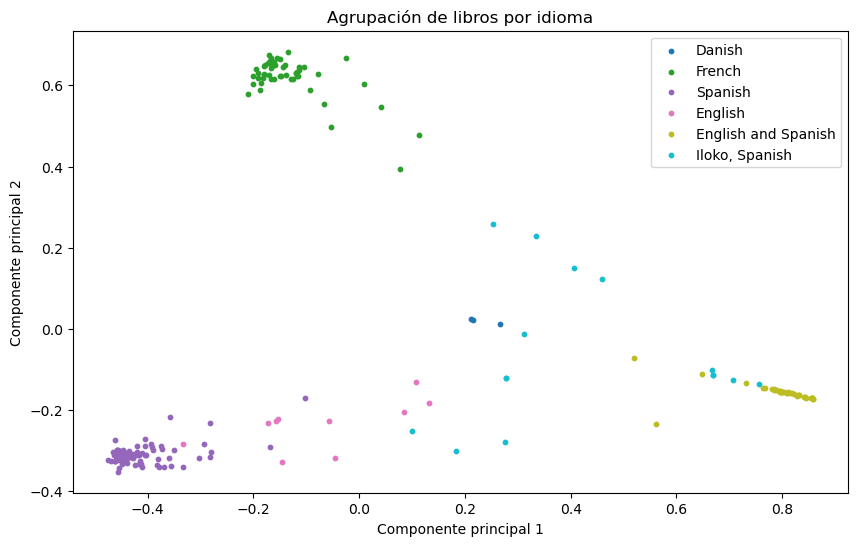

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ast import literal_eval

# Cargar el dataframe desde el archivo CSV
df = pd.read_csv('gutenberg.csv', converters={'Subjects': literal_eval})

# Obtener los textos de los libros por idioma
languages = df['Language'].unique()
texts = []


filenames = df['Filename'].values

for filename in filenames:
    with open(filename, 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        cleaned_text = clean_text(text)
        texts.append(cleaned_text)


# Vectorización de los textos
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Aplicar k-means
k = len(languages)  # Número de clusters igual al número de idiomas
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Obtener las etiquetas de cluster asignadas por k-means
labels = kmeans.labels_
indexes = np.unique(labels, return_index=True)[1]
labels_uniques = [labels[index] for index in sorted(indexes)]

lang_to_label = {k: v for k, v in zip(languages, labels_uniques)}

# Generar la gráfica
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', k)  # Colores para los idiomas

def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices


for i, lang in enumerate(languages):
    lang_indices = find_indices(labels, lang_to_label[lang])
    plt.scatter(X_pca[lang_indices, 0], X_pca[lang_indices, 1], color=colors(i), label=lang, s=10)

plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Agrupación de libros por idioma')
plt.legend()
plt.show()


c. Genera una grafica que ilustre la identificación de géneros en los libros

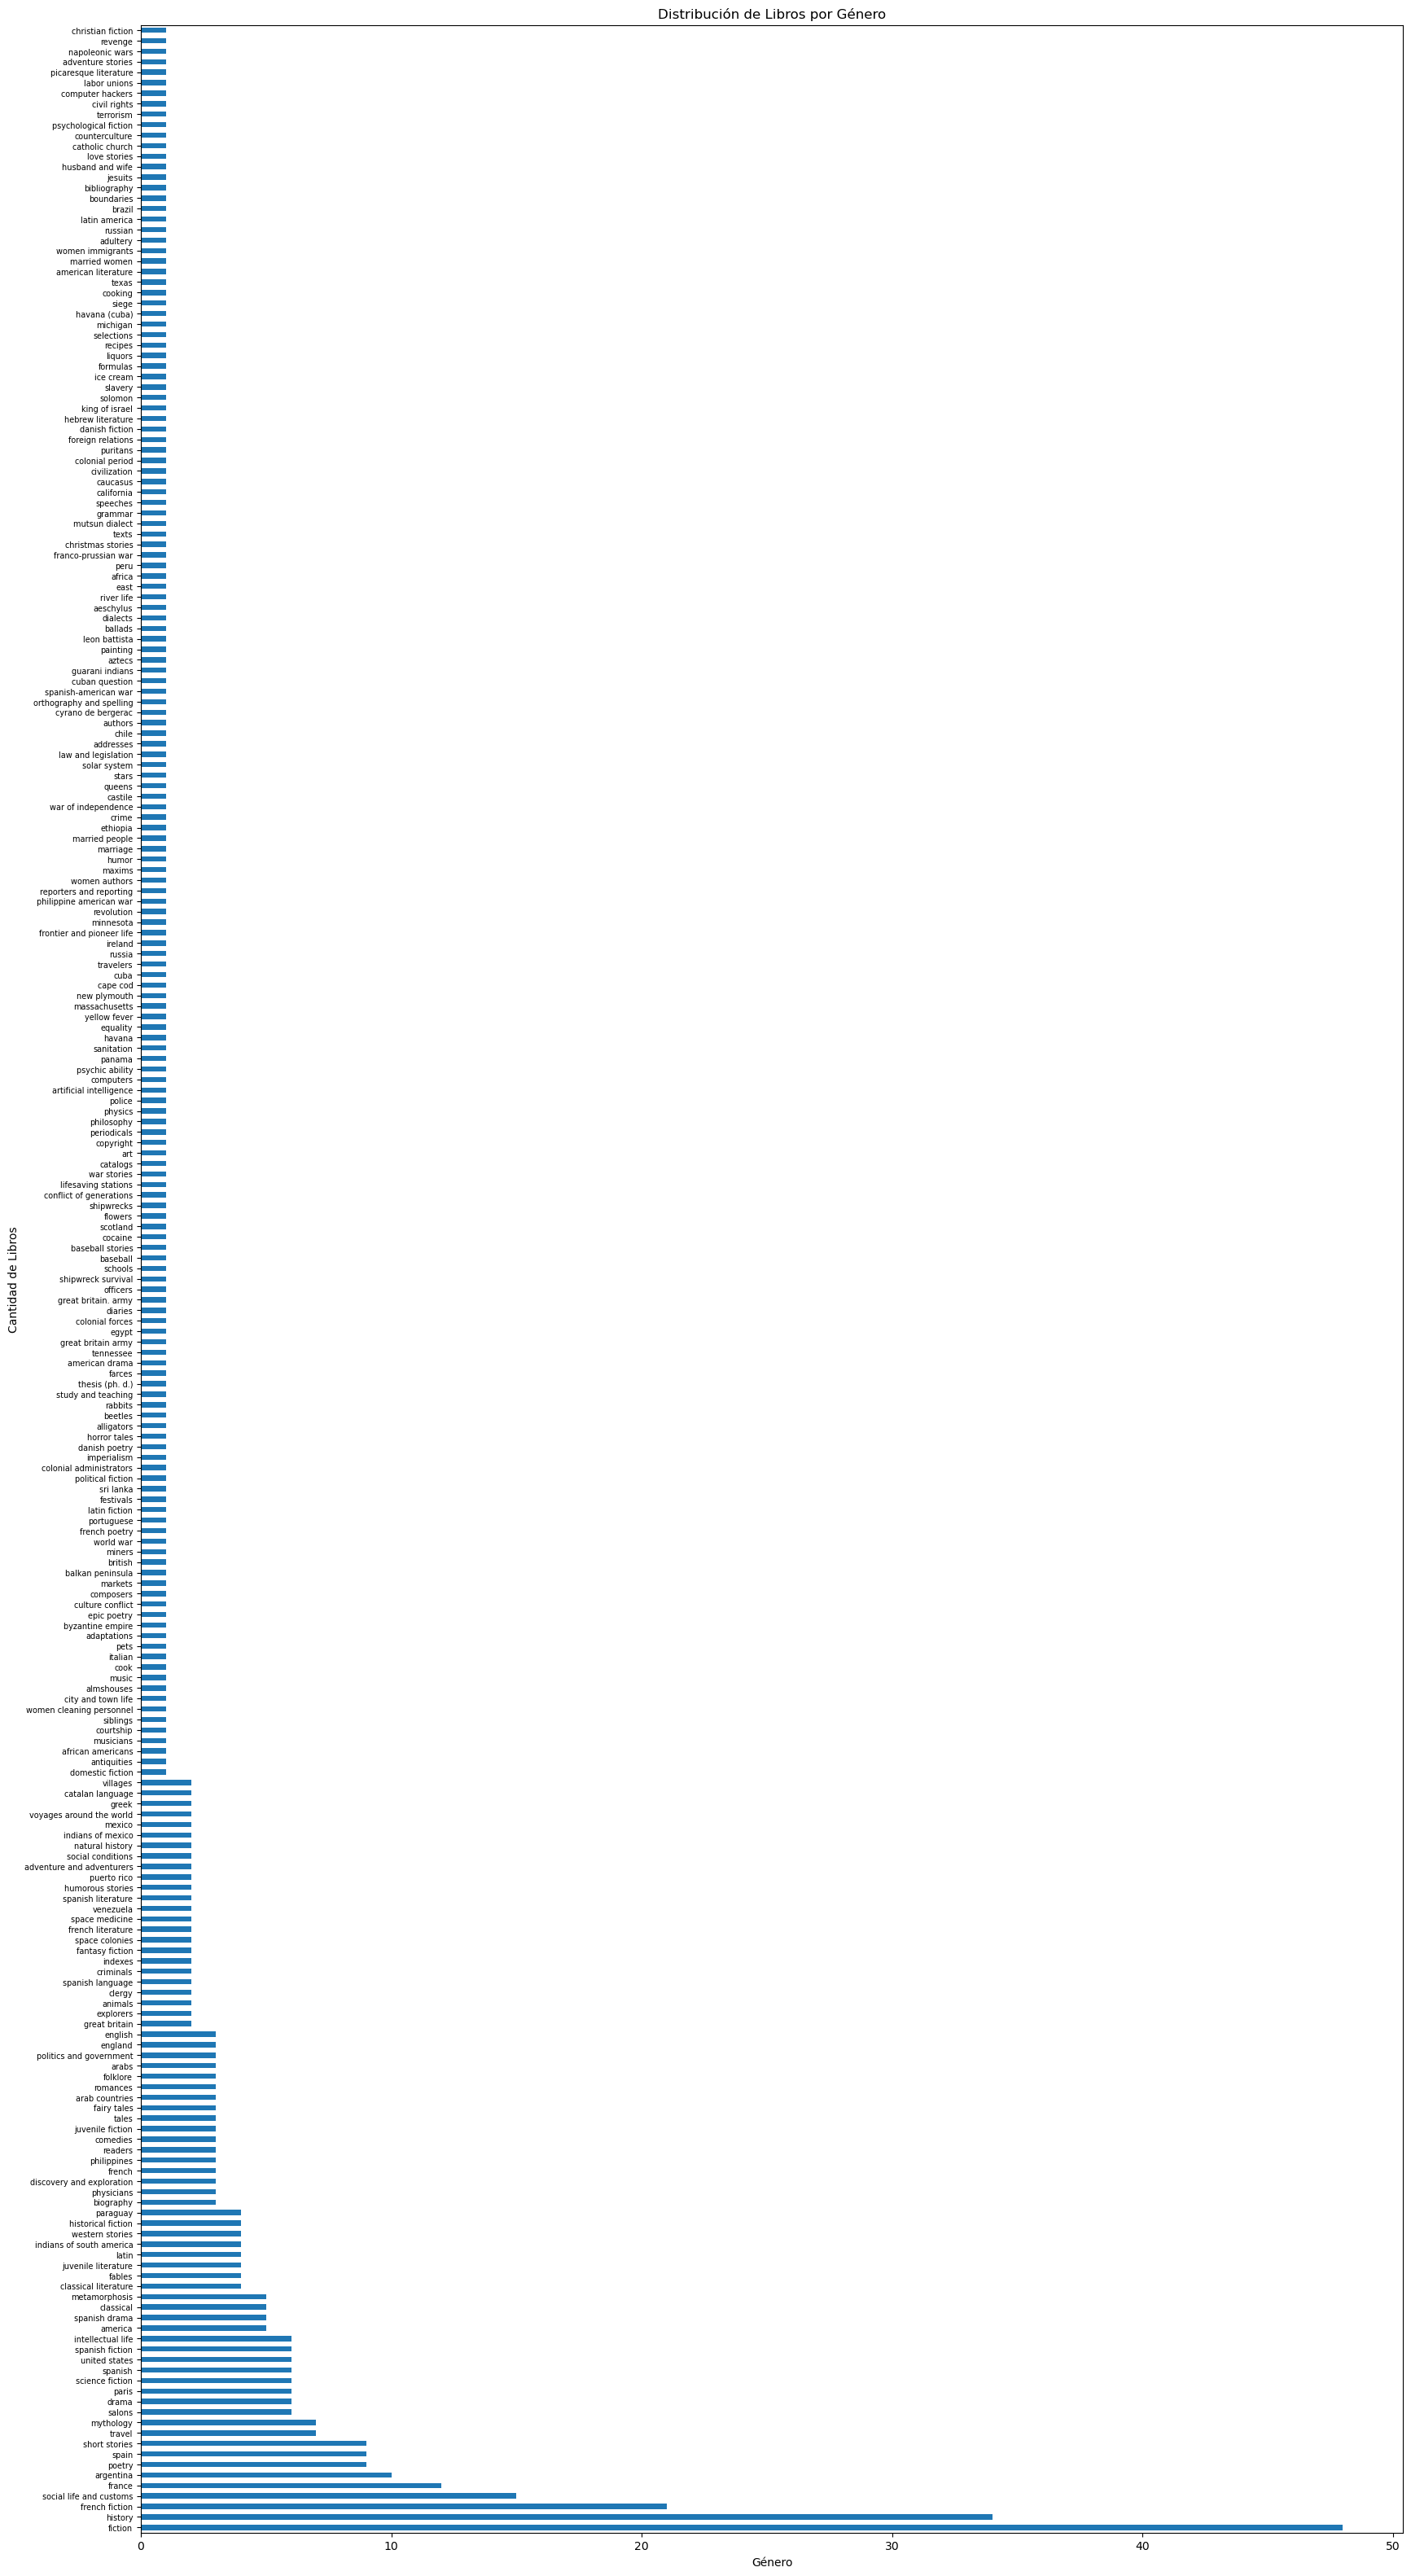

In [45]:
from ast import literal_eval

# Cargar el dataframe desde el archivo CSV
df = pd.read_csv('gutenberg.csv', converters={'Subjects': literal_eval})

# Obtener la cuenta de géneros
genre_counts = df['Subjects'].explode().value_counts()

# Generar la gráfica de barras
plt.figure(figsize=(20, 40))
genre_counts.plot.barh()
plt.xlabel('Género')
plt.ylabel('Cantidad de Libros')
plt.title('Distribución de Libros por Género')
plt.yticks(fontsize=7)
plt.show()
